In [92]:
# install.packages("ggbeeswarm")

In [91]:
# library(dplyr)
# library(ggplot2)
# library(cowplot)
library(ggbeeswarm)

In [1]:
### annotation file (map genes IDs)
annos_file = "/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/scQTLs/annos/combined_feature_id_annos.tsv"
annos = read.csv(annos_file,sep="\t")
# head(annos,2)
annos$feature_id = annos$ensembl_gene_id
head(annos,2)

feature_id,chromosome,start,end,hgnc_symbol,combined_feature_id,ensembl_gene_id
ENSG00000000003,X,99883667,99894988,TSPAN6,ENSG00000000003_TSPAN6,ENSG00000000003
ENSG00000000419,20,49551404,49575092,DPM1,ENSG00000000419_DPM1,ENSG00000000419


In [49]:
annos[annos$hgnc_symbol == 'WWC1',]

,feature_id,chromosome,start,end,hgnc_symbol,combined_feature_id,ensembl_gene_id
3031,ENSG00000113645,5,167718656,167899308,WWC1,ENSG00000113645_WWC1,ENSG00000113645


In [4]:
gene = 'CUL7'
snp = '6_43264895_C_A'

In [81]:
gene = 'WWC1'
snp = '5_167746753_C_G'

In [44]:
e = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/examples/CUL7_e.csv")
# e = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/examples/CUL7_ROT_e.csv")
g = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/examples/CUL7_g.csv")

In [65]:
e = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/examples/WWC1_e.csv")
e1 = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/examples/WWC1_ROT_e.csv")
g = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/examples/WWC1_g.csv")

In [66]:
# head(e)
# head(g)

In [70]:
df = left_join(e,g)
df1 = left_join(e1,g)
# df = df[-which(duplicated(df$donor_id)),]
head(df)

Joining, by = "donor_id"
Joining, by = "donor_id"
Warning message:
“Column `donor_id` joining factors with different levels, coercing to character vector”

donor_id,Expression,Genotype
HPSI0114i-bezi_3,0.03756617,0
HPSI0114i-eipl_1,0.07496104,1
HPSI0114i-fikt_3,0.00000000,0
HPSI0114i-kolf_2,0.03807995,1
HPSI0114i-lexy_2,0.03135755,1
HPSI0114i-posc_1,0.06592987,2


In [71]:
# df[df$Genotype== '2',]

Warning message:
“Removed 4 rows containing non-finite values (stat_ydensity).”Warning message:
“Removed 4 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 4 rows containing missing values (position_quasirandom).”

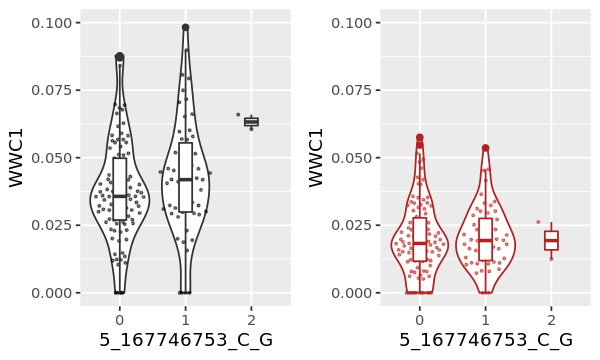

In [96]:
options(repr.plot.width=5, repr.plot.height=3)

p = ggplot(df[df$Genotype %in% c(0,1,2),],aes(x = as.factor(Genotype),y=Expression)) 
p = p + xlab(snp) + ylab(gene) + geom_violin() + ylim(c(0,0.1))
p = p + geom_quasirandom(size = 0.5, alpha = 0.5) + geom_boxplot(width=0.2)

p1 = ggplot(df1[df1$Genotype %in% c(0,1,2),],aes(x = as.factor(Genotype),y=Expression)) + ylim(c(0,0.1))
p1 = p1 + xlab(snp) + ylab(gene) + geom_violin(col = 'firebrick') 
p1 = p1 + geom_quasirandom(size = 0.5, alpha = 0.5, col = 'firebrick') + geom_boxplot(width=0.2, col = 'firebrick')
plot_grid(p, p1, align = "h", ncol = 2)